In [60]:
setwd('/import/DB/fel/BJTC-204')

In [23]:
library(dplyr)

In [50]:
load('/import/mdd.rna/GSE101521.rda')
count = expr3
dim(expr3)
rownames(count) = count[,1]
count = count[,-1]
cli = cli %>% dplyr::filter(V4 =='Male')

[1] 33714    60

In [51]:

library(dplyr)
cli$V2 = gsub('MDD-S','MDD',cli$V2) 
table(cli$V2)
rownames(cli) = cli[,1]
con.sample = cli %>%  dplyr::filter(V2 =='CON') %>% rownames()
MDD.sample = cli %>%  dplyr::filter(V2 =='MDD') %>% rownames()
control = count[,con.sample]
MDD = count[,MDD.sample]
exp <- MDD
prot = c('H4C3','PRSS3','TUSC3')


CON MDD 
 23  19 

In [6]:
exp = exp[unique(prot),] %>% as.matrix()

In [8]:
nmfinput = log2(exp+1)

In [9]:
library(NMF)

Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.2.3"
Loading required package: rngtools

Warning message:
"package 'rngtools' was built under R version 4.2.3"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.2.3"
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [10]:
library(ConsensusClusterPlus)

Warning message:
"package 'ConsensusClusterPlus' was built under R version 4.2.2"


In [11]:
# library(NMF) 

# con <- ConsensusClusterPlus(nmfinput, #矩阵形式
#                             maxK=10, #最大聚类簇数量
#                             reps=100, #抽取的子样本数量
#                             pItem=0.8,#抽样样本的比例 
#                             pFeature=1,
#                             title="resultstrain3", #输出文件夹名字
#                             clusterAlg="km", #选择聚类算法
#                             distance="euclidean", #指定聚类时使用的距离或相关性类型
#                             seed=1234, #中子数
#                             plot="png", #输出格式 （pdf可能会比较难打开）
#                             writeTable=TRUE)

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`)."


group
 1  2 
12  7 

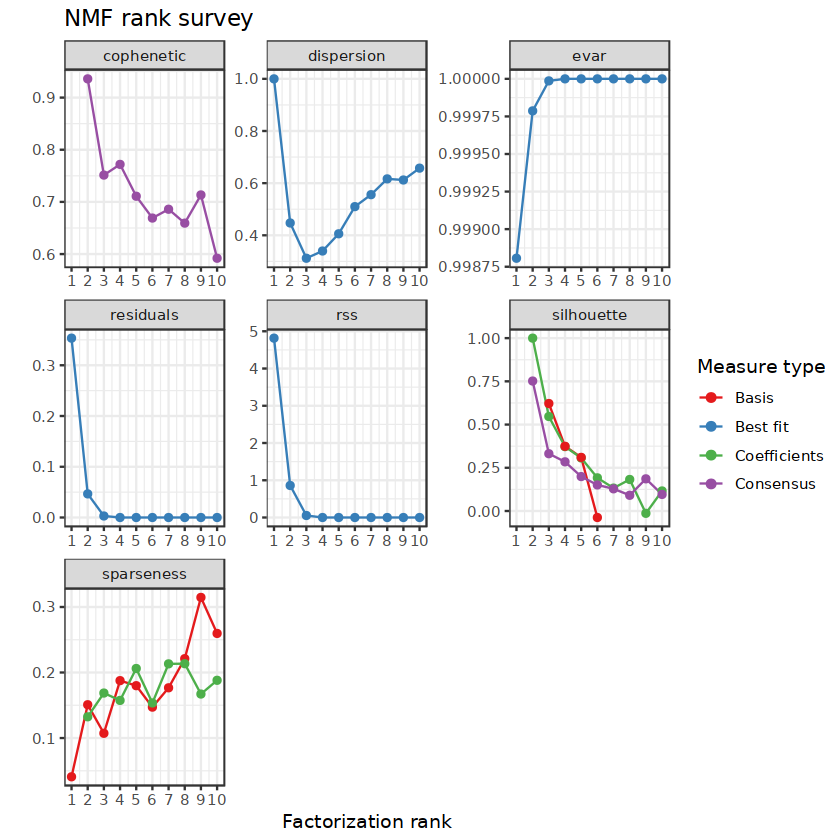

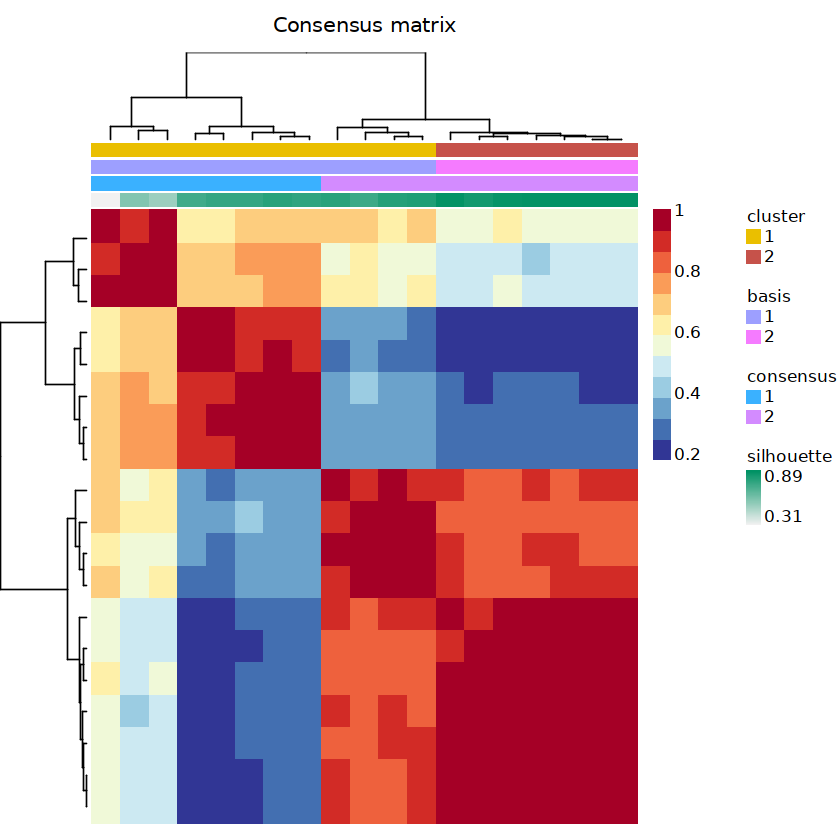

In [13]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

plot(estim.coad)

seed = 202008
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

jco <- c("#BD6263","#8EA325","#A9D179","#84CAC0","#F5AE6B","#BCB8D3","#4387B5")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) 
group <- predict(nmf.rank4) 
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))  # ,"3"=jco[3]

In [17]:
library(tinyarray)

In [18]:
group

V35 V36 V37 V40 V45 V47 V15 V16 V18 V20 V23 V24 V26 V31 V38 V41 V50 V51 V56 
  1   1   1   2   1   1   1   2   2   2   2   1   2   1   1   1   1   1   2 
attr(,"what")
[1] columns
Levels: 1 2

In [29]:
a =  MDD

In [30]:
cg=names(tail(sort(apply(a,1,sd)),100))
n=a[cg,]

In [37]:
group

V35 V36 V37 V40 V45 V47 V15 V16 V18 V20 V23 V24 V26 V31 V38 V41 V50 V51 V56 
  1   1   1   2   1   1   1   2   2   2   2   1   2   1   1   1   1   1   2 
attr(,"what")
[1] columns
Levels: 1 2

In [38]:
colnames(a)

[1] "V35" "V36" "V37" "V40" "V45" "V47" "V15" "V16" "V18" "V20" "V23" "V24"
[13] "V26" "V31" "V38" "V41" "V50" "V51" "V56"

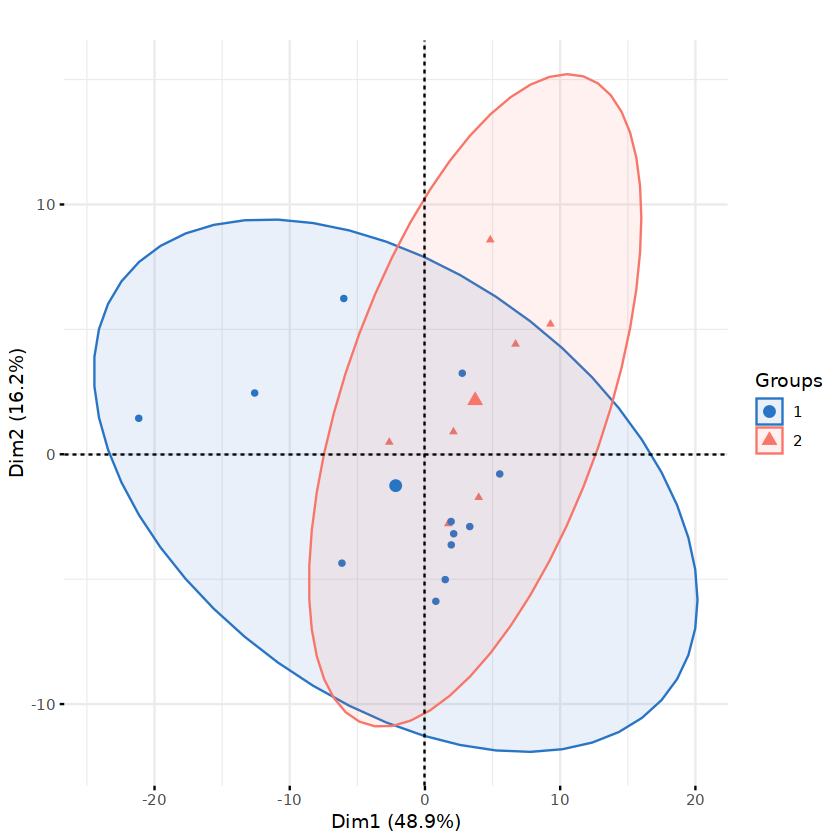

In [31]:
draw_pca(n,group)

In [32]:
group

V35 V36 V37 V40 V45 V47 V15 V16 V18 V20 V23 V24 V26 V31 V38 V41 V50 V51 V56 
  1   1   1   2   1   1   1   2   2   2   2   1   2   1   1   1   1   1   2 
attr(,"what")
[1] columns
Levels: 1 2

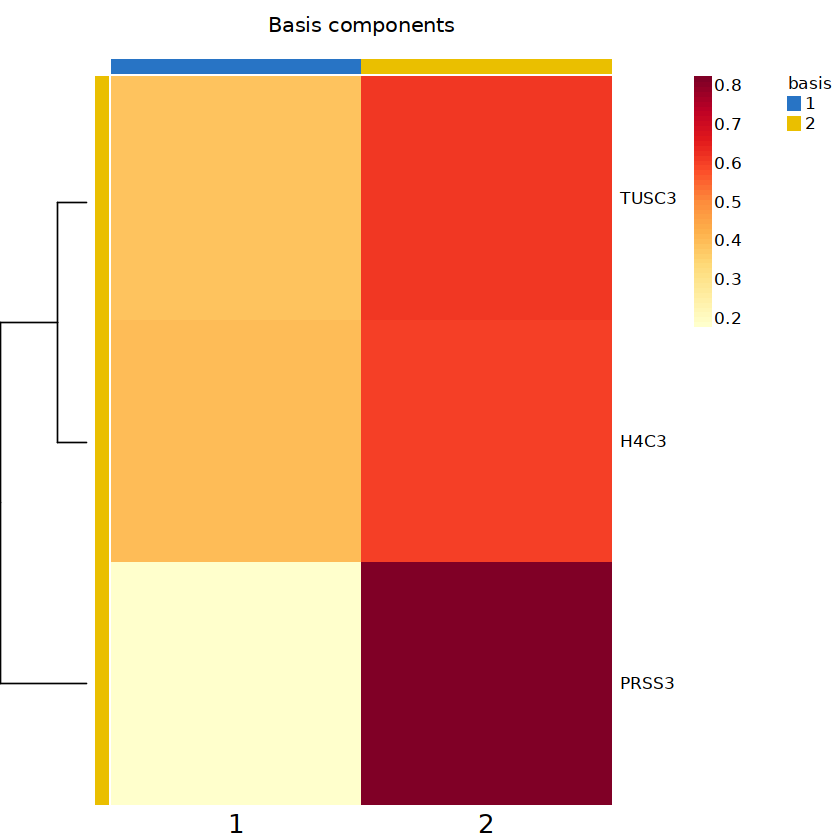

In [33]:
basismap(nmf.rank4,
         cexCol = 1.5,
         cexRow = 1,
         annColors=list(c("#2874C5","#EABF00","#C6524A","#868686")))

In [34]:
options(repr.plot.width = 6,repr.plot.height = 5)

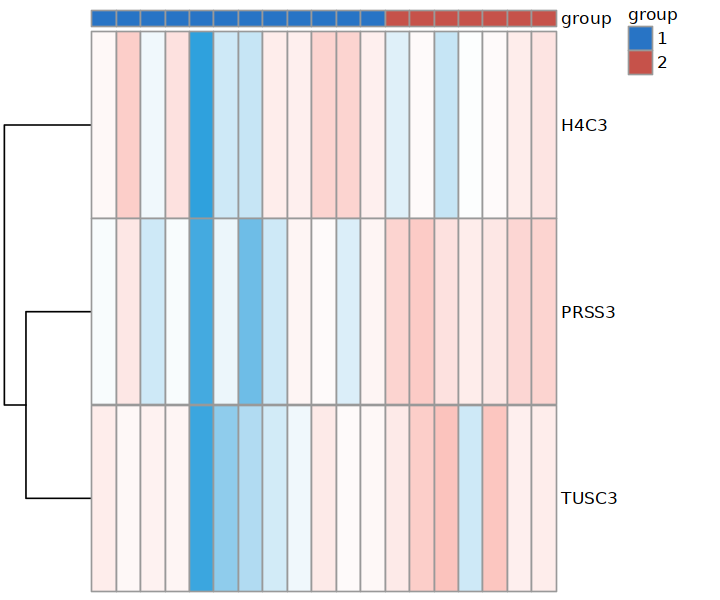

In [35]:
dp = nmfinput[,order(group)]
draw_heatmap(dp,sort(group),
             color_an = c("#2874C5","#C6524A","#868686"),
             annotation_legend = T,
             cluster_cols = F,
             show_rownames = T)

### 比较临床数据特征

In [39]:
head(cli)

,V1,V2,V3,V4
,<chr>,<chr>,<int>,<chr>
1,V35,MDD,19,Male
2,V36,MDD,67,Male
3,V37,MDD,53,Male
4,V40,MDD,69,Male
5,V45,MDD,62,Male
6,V47,MDD,66,Male


In [52]:
cli2 = cli %>%  filter(V2 =='MDD')

In [86]:
group1 = as.data.frame(group)

In [54]:
diamonds2  = cbind(group1,cli2)

In [55]:
library(ggstatsplot)
library(ggplot2)
library(dplyr)

In [56]:
table(diamonds2$V2)


MDD 
 19 

In [57]:
diamonds2$age = ifelse(diamonds2$V3 > 40 ,'old','young')

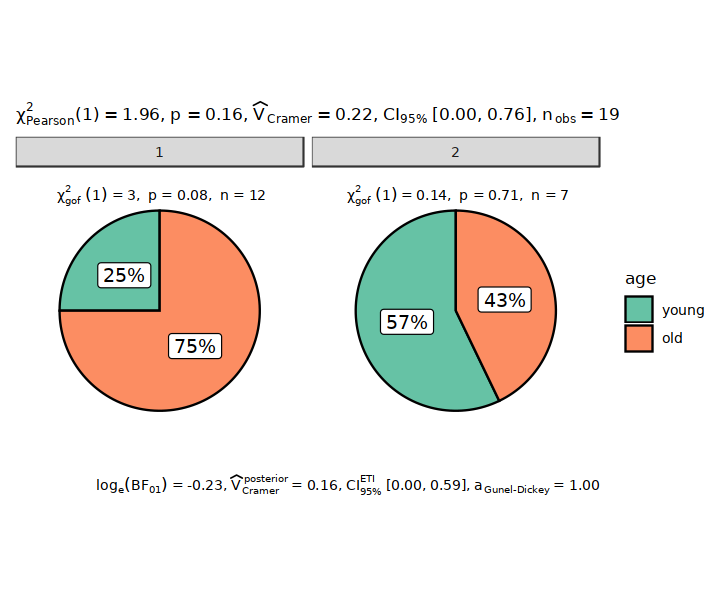

In [58]:
ggpiestats(diamonds2, age, group, palette = 'Set2')

### 不同亚型

In [79]:
load('testset2.rda')

In [82]:
dataset = dataset[,-12]

In [88]:
group1$group = paste0('subtype',group1$group)
ano = group1 %>%  tibble::rownames_to_column(.,'sample')

In [89]:
all = left_join(ano,dataset,by = 'sample')

In [91]:
head(all,2)
my_comparisons = list(c('subtype1','subtype2'))
library(ggpubr)

,sample,group,Condition,age,sex,Mic,ExN,InN,Oli,Ast,OPC,End
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V35,subtype1,MDD,19,Male,1.324025e-03,0.7736835,0.0002793643,0.09511661,0.08615979,3.328686e-06,0.04343339
2,V36,subtype1,MDD,67,Male,7.418888e-06,0.8324665,0.0290396066,0.02173987,0.07517479,2.469343e-06,0.04156934


Warning message:
"package 'ggpubr' was built under R version 4.2.3"


In [92]:
options(repr.plot.height = 8.5,repr.plot.width = 8)

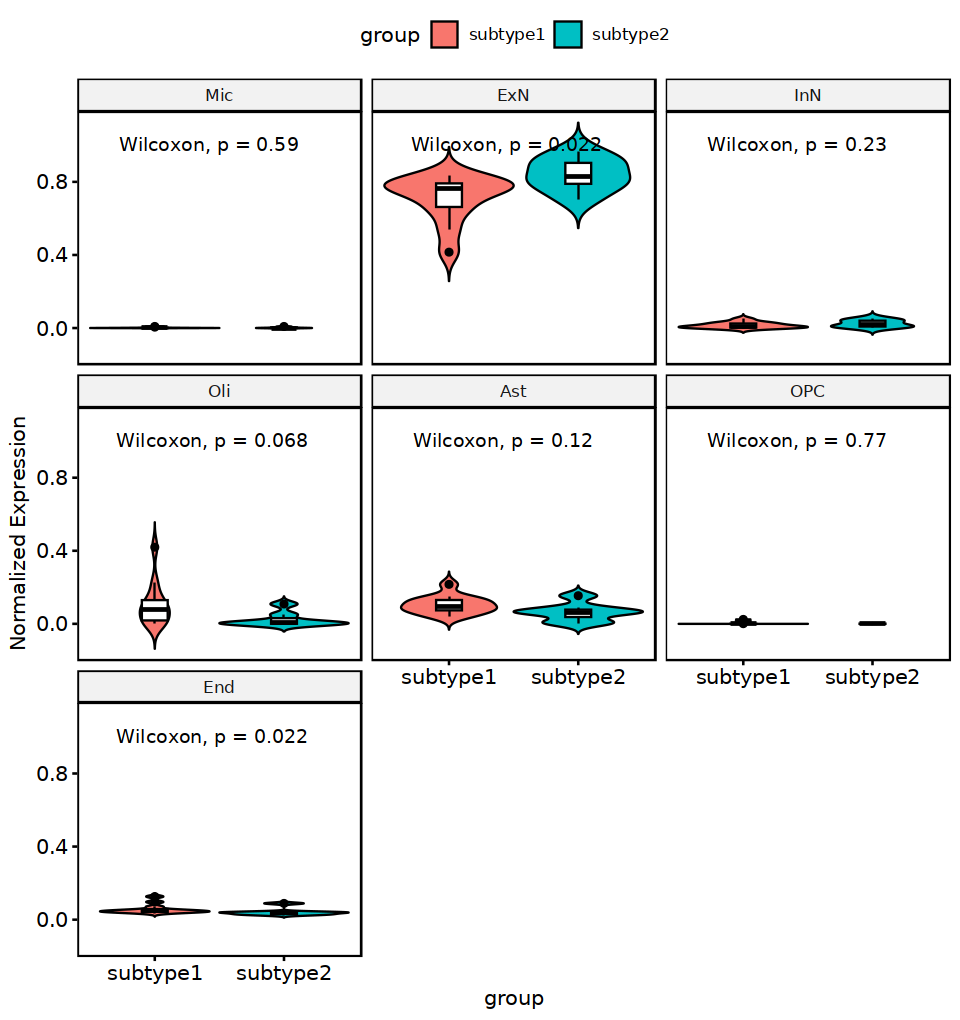

In [93]:
all %>% 
  #dplyr::filter(group %in% c("IBC","N","DCIS")) %>% 
  ggviolin(x = "group", y = c(colnames(all)[6:12]), fill = "group",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))+
stat_compare_means()

In [94]:
head(all,2)

,sample,group,Condition,age,sex,Mic,ExN,InN,Oli,Ast,OPC,End
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V35,subtype1,MDD,19,Male,1.324025e-03,0.7736835,0.0002793643,0.09511661,0.08615979,3.328686e-06,0.04343339
2,V36,subtype1,MDD,67,Male,7.418888e-06,0.8324665,0.0290396066,0.02173987,0.07517479,2.469343e-06,0.04156934


In [95]:
all1 = all[,c(1,2)]

In [96]:
save(all1,file = 'testset2.groups.rda')